In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data loading

In [2]:
open_domain_path = '../data/arxiv.csv' # open domain dataset
specific_domain_path = '../data/fintech_domain.parquet' # fintech domain dataset

In [3]:
def load_data(open_domain=open_domain_path, specific_domain=specific_domain_path):
    open_data = pd.read_csv(open_domain)
    specific_data = pd.read_parquet(specific_domain)
    return open_data, specific_data


In [4]:
open_data, specific_data = load_data()

In [5]:
open_data = open_data[['Question', 'Response']]
specific_data = specific_data[['input', 'output']]

# Utilities

In [6]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return filtered_df

In [7]:
def get_col_len(column_name, df, df_name, remove_outliers_flag=False):

    df.loc[:, f'{column_name}_length'] = df[column_name].str.split().str.len()  

    if remove_outliers_flag:
        df = remove_outliers(df, f'{column_name}_length')
    
    plt.figure(figsize=(8, 6))
    sns.histplot(df[f'{column_name}_length'], bins=10, kde=True)
    plt.title(f'{column_name} Length Distribution of the Dataset {df_name}')
    plt.xlabel('Total Words')
    plt.ylabel('Count of Texts')
    plt.show()

    word_count = df[f'{column_name}_length'] 
    return word_count.mean(), word_count.median(), word_count.max(), word_count.min()
    

# Open-domain data analysis 

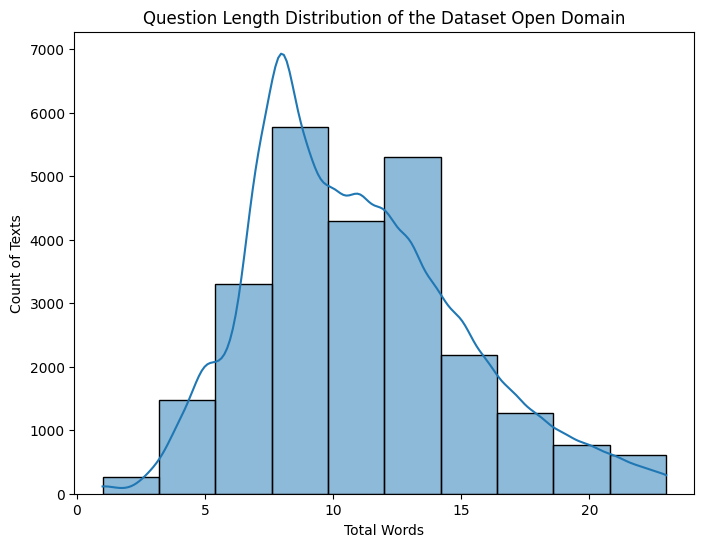

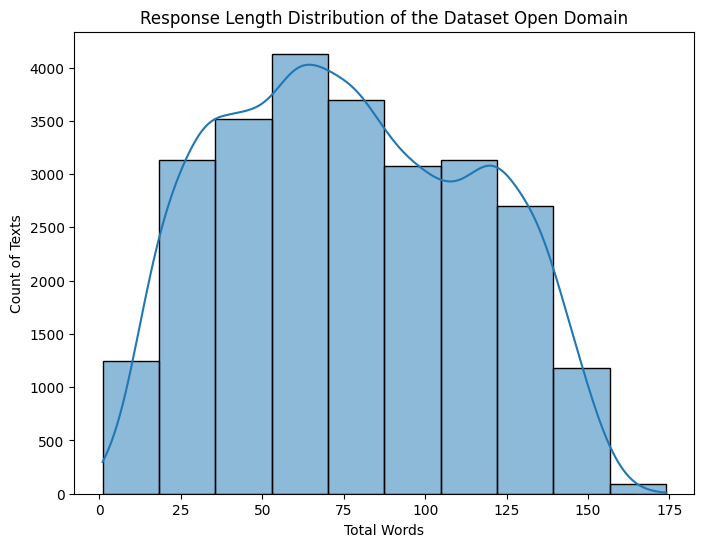

In [8]:
q_open_mean, q_open_median, q_open_max, q_open_min = get_col_len('Question', open_data, "Open Domain", remove_outliers_flag=True)
a_open_mean, a_open_median, a_open_max, a_open_min = get_col_len('Response', open_data, "Open Domain", remove_outliers_flag=True)

# Specific-domain data analysis

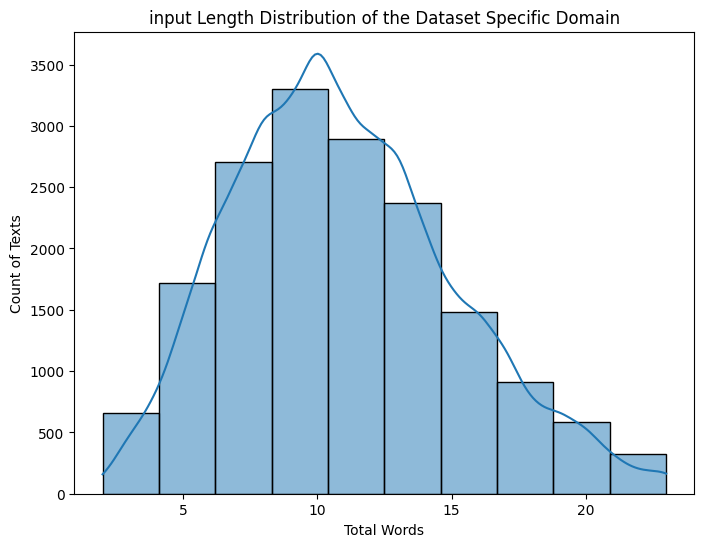

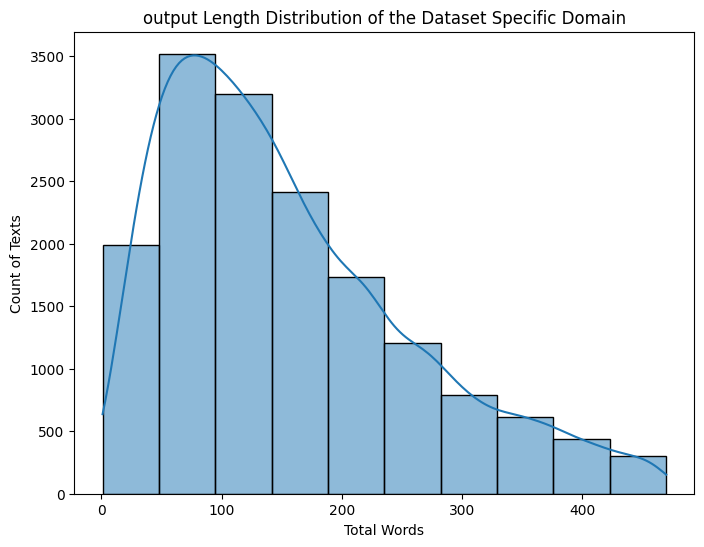

In [9]:
q_specific_mean, q_specific_median, q_specific_max, q_specific_min = get_col_len('input', specific_data, "Specific Domain", remove_outliers_flag=True)
a_specific_mean, a_specific_median, a_specific_max, a_specific_min = get_col_len('output', specific_data, "Specific Domain", remove_outliers_flag=True)

In [10]:
print(f"Open Domain Question: Mean: {q_open_mean}, Median: {q_open_median}, Max: {q_open_max}, Min: {q_open_min}")
print(f"Open Domain Response: Mean: {a_open_mean}, Median: {a_open_median}, Max: {a_open_max}, Min: {a_open_min}")
print()
print(f"Specific Domain Question: Mean: {q_specific_mean}, Median: {q_specific_median}, Max: {q_specific_max}, Min: {q_specific_min}")
print(f"Specific Domain Response: Mean: {a_specific_mean}, Median: {a_specific_median}, Max: {a_specific_max}, Min: {a_specific_min}")

Open Domain Question: Mean: 10.926772277227723, Median: 10.0, Max: 23.0, Min: 1.0
Open Domain Response: Mean: 76.94570292903175, Median: 75.0, Max: 174, Min: 1

Specific Domain Question: Mean: 10.983835761901952, Median: 11.0, Max: 23, Min: 2
Specific Domain Response: Mean: 155.80378965559808, Median: 132.0, Max: 470, Min: 1


In [11]:
open_data.to_csv('../data/open_domain_clean.csv', index=False)
specific_data.to_csv('../data/specific_domain_clean.csv', index=False)